In [186]:
import pandas as pd
import numpy as np
from typing import Optional, List
import matplotlib.pyplot as plt
import statsmodels.api as s
from statsmodels.tsa.stattools import grangercausalitytests

In [187]:
df = pd.read_excel("/Users/wei/UCD-MPH/MPH-Lecture:Modules/MPH Dissertation/Data/19_ratified_country.xlsx")

In [190]:
def plot_relationship(df: pd.DataFrame,
                      select_country: Optional[List[str]] = None,
                      variable_1: Optional[str] = None,
                      variable_2: Optional[str] = None,
                      variable_3: Optional[str] = None,
                      variable_4: Optional[str] = None,
                      x_label: Optional[str] = None,
                      y_label: Optional[str] = None,
                      save_path: Optional[str] = None) -> None:
    # convert 'Year' column to string type
    df['Year'] = df['Year'].astype(str)
    # filter by selected countries
    if select_country is not None:
        for country in select_country:
            country_df = df[df['Country Name'] == country]
            # create a new figure with 2 subplots
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
            # plot variable_1 and variable_2 on the first subplot
            ax1.plot(country_df['Year'], country_df[variable_1], color='b')
            ax1.plot(country_df['Year'], country_df[variable_2], color='r')
            ax1.set_xlabel(x_label or 'Year')
            ax1.set_ylabel('Prevalence of Tobacco Use & CVD Mortality', color='k')
            ax1.tick_params(axis='y', labelcolor='k')
            ax1.legend(['Prevalence of Tobacco Use in Males (%)', 'CVD Mortality in Males (%)'], loc='upper left')
            # plot variable_3 and variable_4 on the second subplot
            ax2.plot(country_df['Year'], country_df[variable_3], color='g')
            ax2.plot(country_df['Year'], country_df[variable_4], color='m')
            ax2.set_xlabel(x_label or 'Year')
            ax2.set_ylabel('Prevalence of Tobacco Use & CVD Mortality', color='k')
            ax2.tick_params(axis='y', labelcolor='k')
            ax2.legend(['Prevalence of Tobacco Use in Females (%)', 'CVD Mortality in Females (%)'], loc='upper left')
            # set titles and axis labels for the figure
            plt.suptitle(f'{country} Statistics')
            plt.xticks(country_df['Year'])
            
            if y_label is not None:
                fig.text(0.06, 0.5, y_label, va='center', rotation='vertical')
            if save_path is not None:
                if not os.path.exists(os.path.dirname(save_path)):
                    os.makedirs(os.path.dirname(save_path))
                fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()


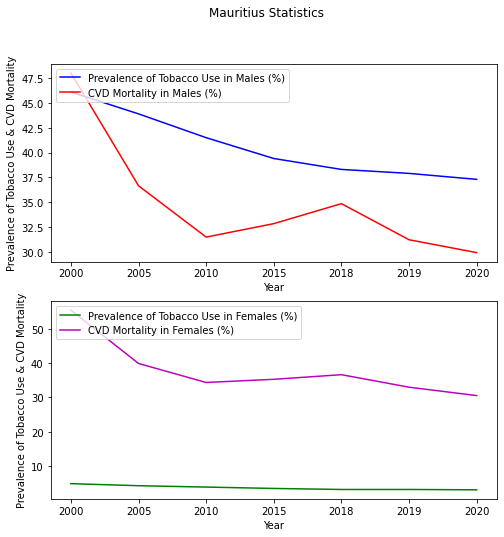

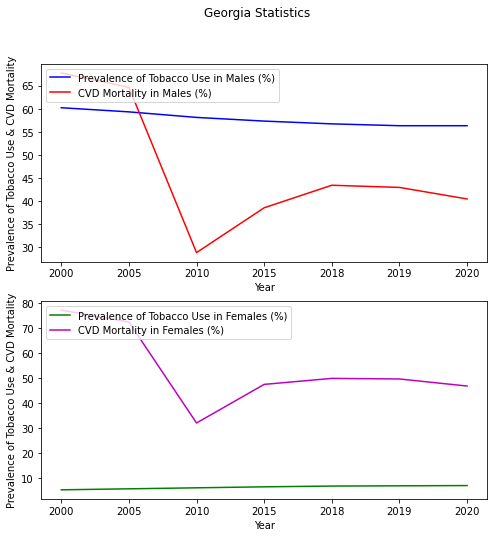

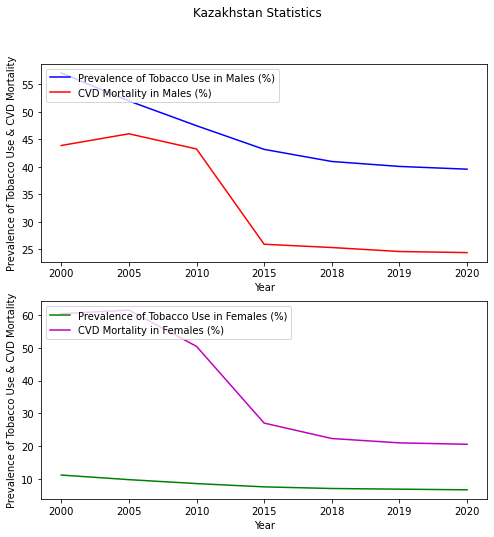

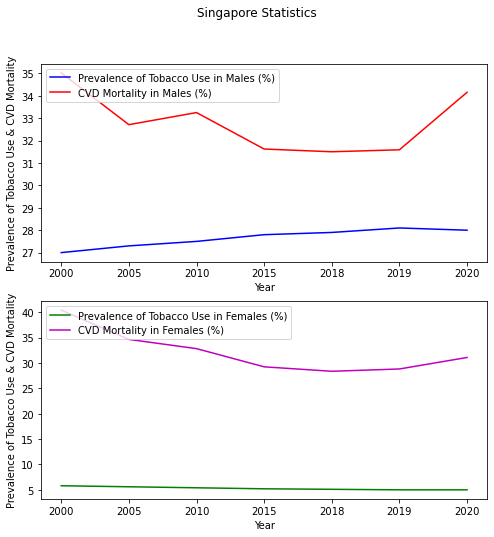

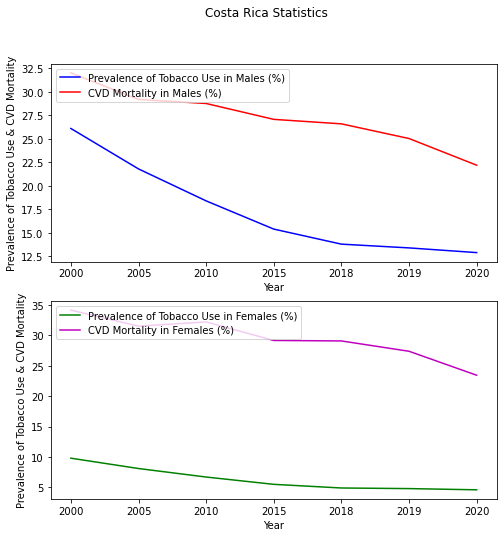

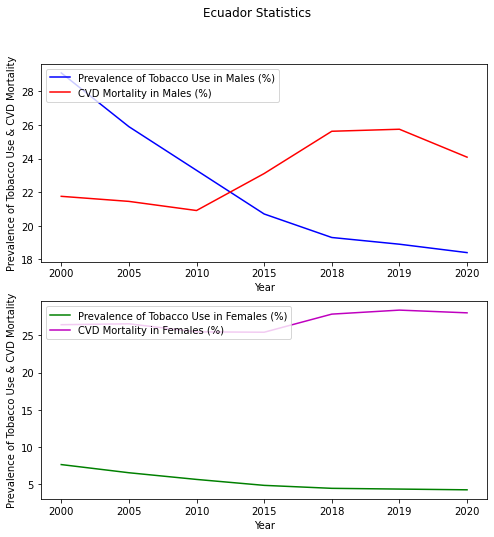

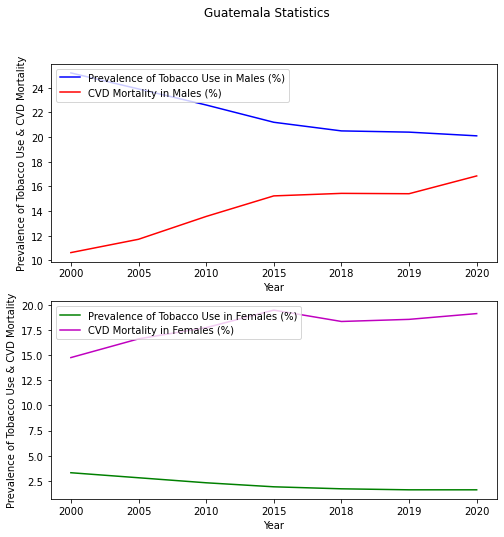

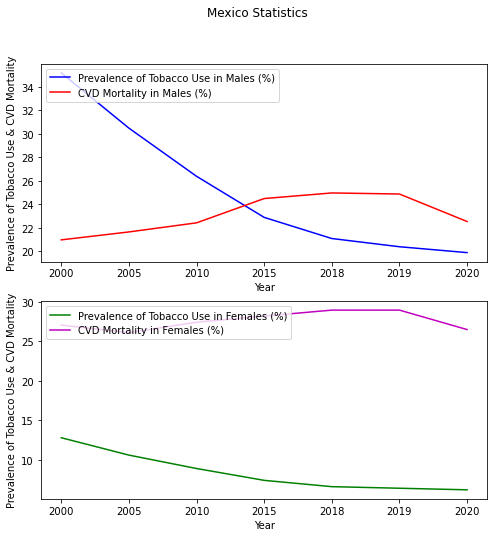

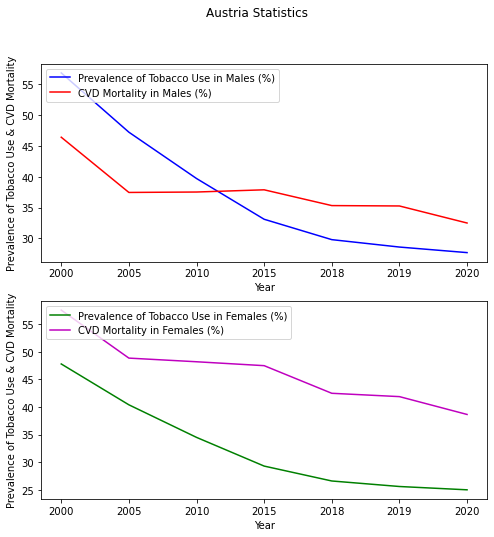

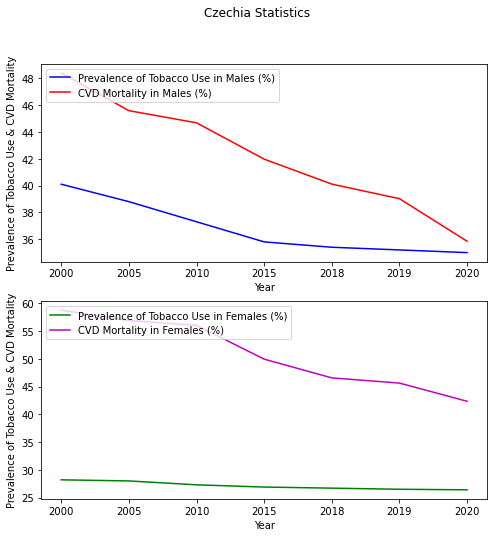

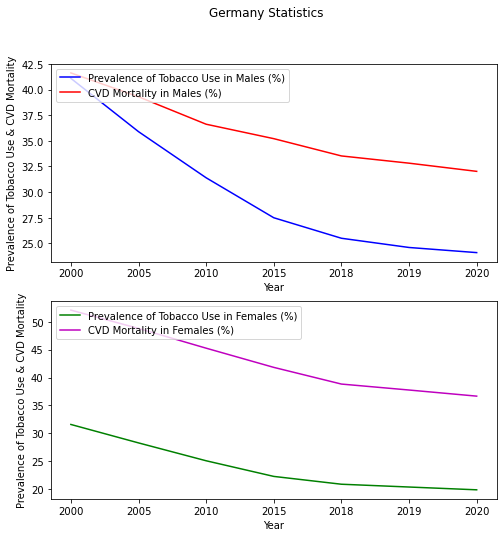

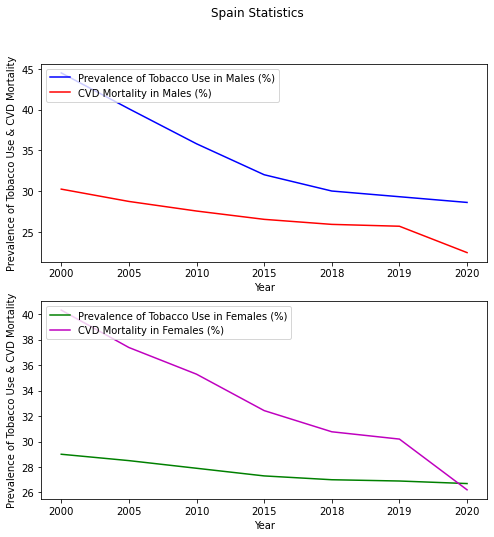

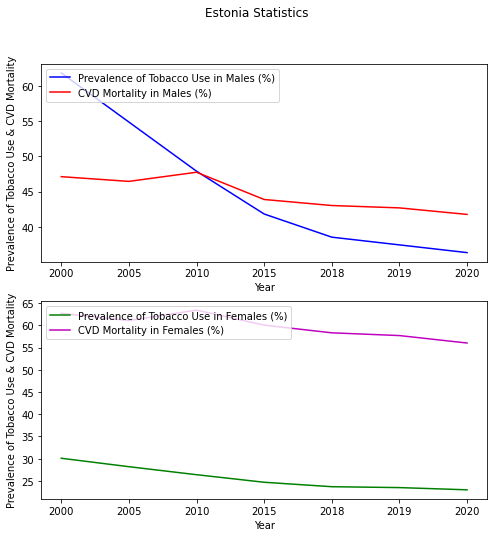

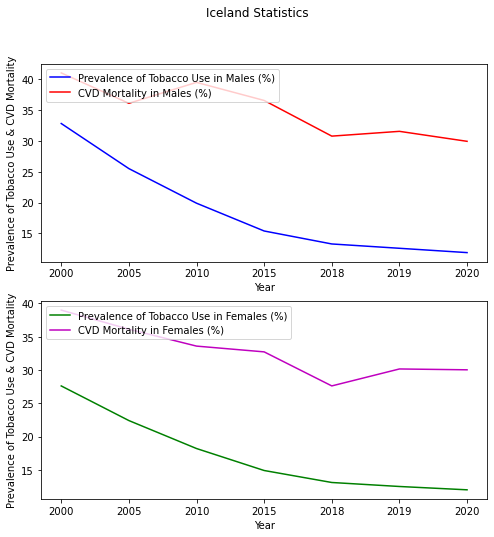

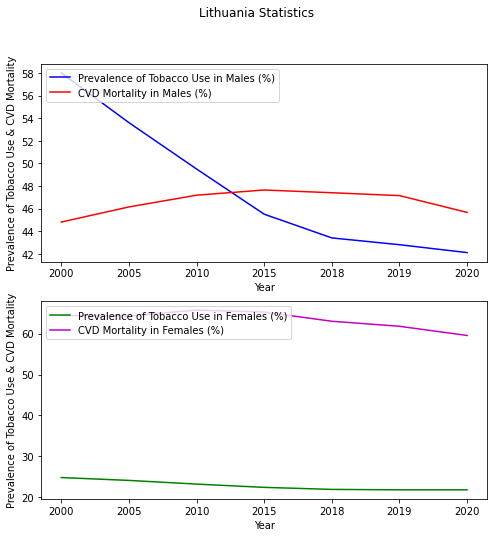

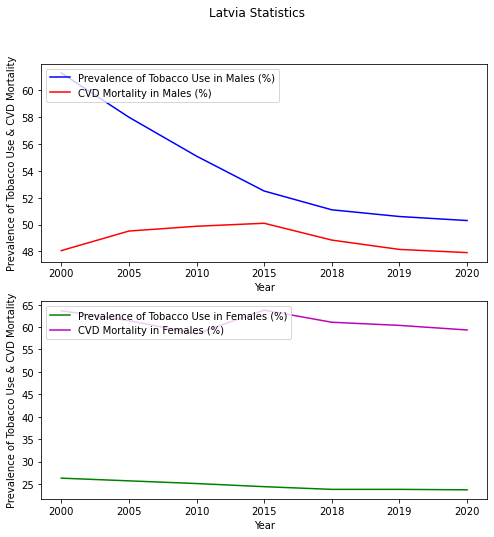

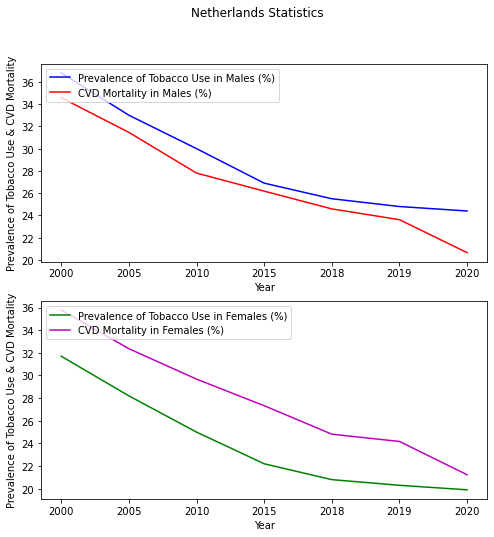

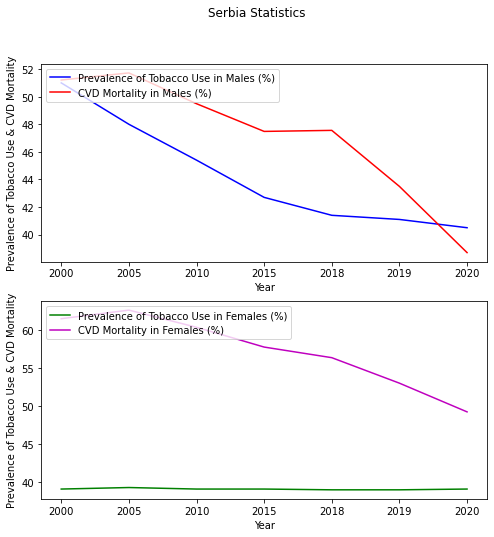

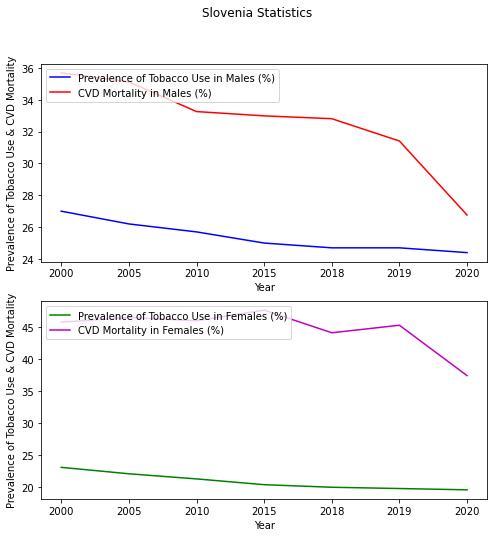

In [191]:
select_country = df['Country Name'].unique()
variable_1 = 'Male_Estimate_of_Current_Tobacco_Use_Prevalence_age_standardized_rate'
variable_2 = 'Male_Total_Percentage_of_Cause_Specific_Deaths_Out_Of_Total_Deaths'
variable_3 = 'Female_Estimate_of_Current_Tobacco_Use_Prevalence_age_standardized_rate'
variable_4 = 'Female_Total_Percentage_of_Cause_Specific_Deaths_Out_Of_Total_Deaths'
x_label = 'Year'


plot_relationship(df,select_country = select_country,
                  variable_1 = variable_1,
                  variable_2 = variable_2,
                  variable_3 = variable_3,
                  variable_4 = variable_4,
                  x_label =x_label)
